# A/B Test Analysis

# Project Description

Context
You are an analyst of a large online store. Together with the marketing department, you have prepared a list of hypotheses for increasing revenue.
Prioritize hypotheses, run an A / B test, and analyze the results.

* [Этап 1. Установка библиотек, чтение файлов](#1-bullet)
* [Этап 2. Приоритизация гипотез](#2-bullet)
* [Этап 3. Анализ А\B теста.](#3-bullet)
* [Этап 4. Вывод.](#4-bullet)

## Установка библиотек и чтение файлов.

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math
import datetime

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

## Приоритизация гипотез.

Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета. (ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач) 
<br>


$$ICE SCORE = Impact * Confidence * Ease$$

$$ICE = \frac{Impact * Confidence}{Efforts}$$

</div>

In [3]:
hypothesis_2  = hypothesis

In [4]:
hypothesis_2['ICE'] = hypothesis_2['Impact'] * hypothesis_2['Confidence'] / hypothesis_2['Efforts']

In [5]:
pd.set_option("max_colwidth", 100)
display(hypothesis_2[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Из таблицы видно, что наибольшая приоритизация у гипотезы методом ICE поl номером 8(по индексу) - Запустить акцию, дающую скидку на товар в день рождения, наименьший приоритет у задачи под индексом 4 - Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей

Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета. (RICE (R от англ. reach, «охват»))
<br>

$$RICE SCORE = \frac{Reach * Impact * Confidence}{Effort}$$

<div>

In [6]:
hypothesis_2['RICE'] = hypothesis_2['Reach'] * hypothesis_2['Impact'] *  hypothesis_2['Confidence'] / hypothesis_2['Efforts']

In [7]:
pd.set_option("max_colwidth", 100)
display(hypothesis_2[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


А применяя данную технику приоритизации гипотез можем заметить другую картину, теперь гипотеза 8 уже не так важна, как раньше, а самой приоритетной стала гипотеза номер 7, которая раньше была на 3 месте, но при этом наименее приоритетная задача осталась такая же - 4, произогло так из_за внедрения оценки Reach, что означает охват, видимо для 8 охват не такой большой(самый маленький, на самом деле - 1, в то время как у 7 - 10)

## Анализ A/B теста.

Постройм график кумулятивной выручки по группам. Сделаем выводы и предположения.

In [8]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Создадим массив уникальных пар значений дат и групп теста

In [10]:
datesGroups = orders[['date','group']].drop_duplicates() 

Соберём агрегированные кумулятивные по дням данные о заказах в несколько действий.

In [11]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина

In [12]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия

In [13]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [14]:
display(cumulativeData.head())

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования

In [15]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

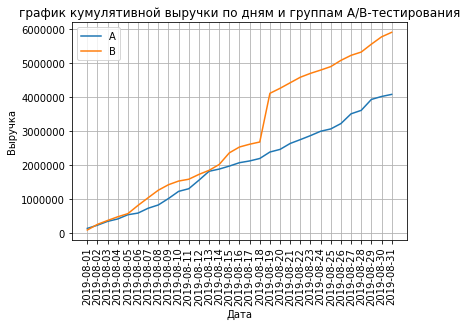

In [16]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')


plt.legend() 

plt.title('график кумулятивной выручки по дням и группам A/B-тестирования')
plt.xticks(rotation=90)
plt.xlabel("Дата")
plt.ylabel("Выручка")
plt.grid()
plt.show()

Выручка увеличивается в течение теста, но если про группу А можно сказать, что ее рост плавный, то вот для группы В есть резкий скачок с 2019-09-18. Это может быть выбросами

Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения

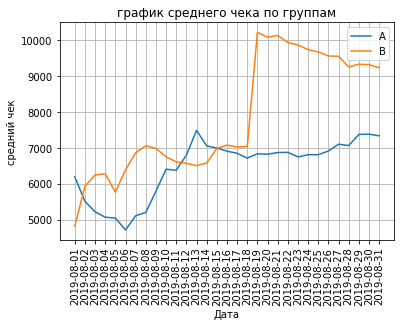

In [17]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title('график среднего чека по группам')
plt.xticks(rotation=90) 
plt.xlabel("Дата")
plt.ylabel("средний чек")
plt.grid()
plt.show()

Ну такой график точно говорит нам о наличии выбросов, особенно это заметно для группы В в уже отмеченную дату. Сюда закрались чересчур дорогие покупки

Построим график относительного различия для среднего чека. 

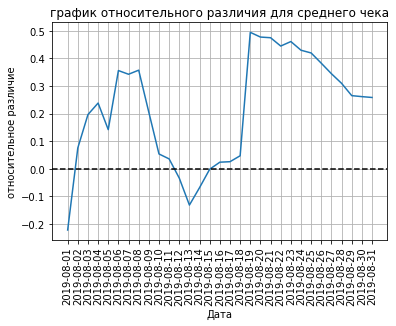

In [18]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('график относительного различия для среднего чека')
plt.xticks(rotation=90) 
plt.xlabel("Дата")
plt.ylabel("относительное различие")
plt.grid()
plt.show()

график сильно различается в нескольких точках, значит разница связана именно с выбросами в виде крупных заказов.

Построим график кумулятивной конверсии по группам, у нас уже есть минимальные и максимальные значения для оси x, добавим их в формулу графика.

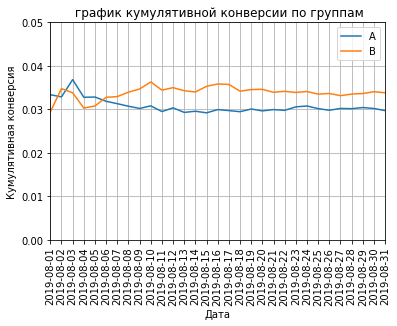

In [19]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']


cumulativeDataA = cumulativeData[cumulativeData['group']=='A']


cumulativeDataB = cumulativeData[cumulativeData['group']=='B']


plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()


plt.axis(["2019-08-01", '2019-08-31', 0, 0.05])
plt.title(' график кумулятивной конверсии по группам')
plt.xticks(rotation=90) 
plt.xlabel("Дата")
plt.ylabel("Кумулятивная конверсия")
plt.grid()
plt.show()

До 2019-08-06 группы находились примерно на одинаковых показателях, после чего группа В ушла вверх, а группа А начала падать

Построим график относительного различия кумулятивных конверсий

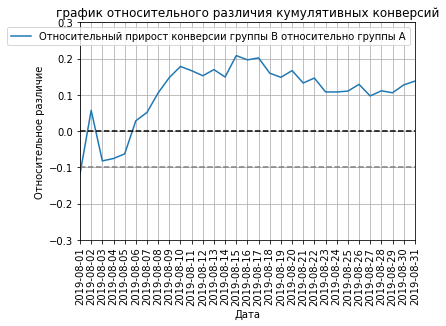

In [20]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.3, 0.3])
plt.xticks(rotation=90) 
plt.title('график относительного различия кумулятивных конверсий')
plt.xlabel("Дата")
plt.ylabel("Относительное различие")
plt.grid()
plt.show()

График скачет туда-сюда, но тендеция более-менее понятна: конверсия группы В по отношению к А положительна, хотя под конец теста она стала уменьшаться

Построим точечный график количества заказов по пользователям

Подсчитаем количество заказов по пользователям

In [21]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [22]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})


In [23]:
ordersByUsers.columns = ['userId','orders']


In [24]:
display(ordersByUsers.sort_values(by='orders',ascending=False).head(10)) 

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


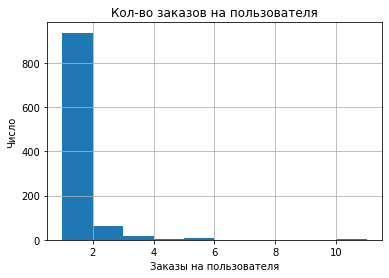

In [25]:
plt.hist(ordersByUsers['orders']) 
plt.title('Кол-во заказов на пользователя')
plt.xlabel("Заказы на пользователя")
plt.ylabel("Число")
plt.grid()
plt.show()

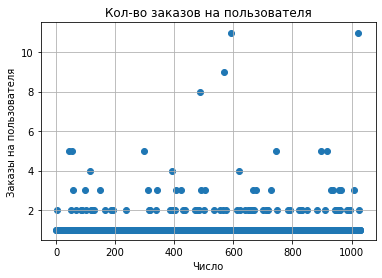

In [26]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Кол-во заказов на пользователя')
plt.xlabel("Число")
plt.ylabel("Заказы на пользователя")
plt.grid()
plt.show()

Как и гистограмма, точечный рисунок говорит нам о том, что очень много пользователей с числом заказов от 1 до 2, чуть меньше от 2 до 3, после 4 заказов уже очень мало

In [27]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 2. 4.]


не более 5% оформили больше 2 заказов, и только не более 1% оформили больше 4, 10% заказывали больше одного раза.

установим нижнюю границу числа заказов на отметке в 2

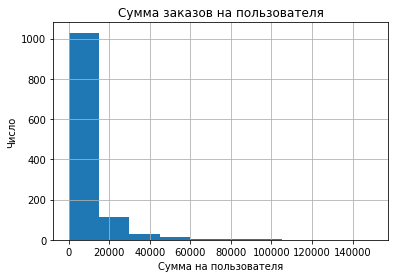

In [28]:
plt.hist(orders['revenue'], range = (0, 150000)) 
plt.title('Сумма заказов на пользователя')
plt.xlabel("Сумма на пользователя")
plt.ylabel("Число")
plt.grid()
plt.show()

Есть даже заказы больше 100000, но большая часть из них не такие крупные

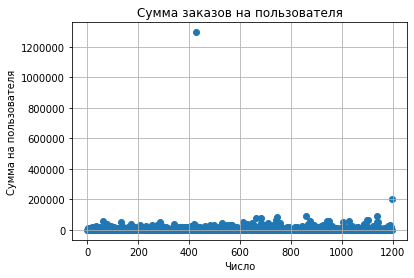

In [29]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Сумма заказов на пользователя')
plt.xlabel("Число")
plt.ylabel("Сумма на пользователя")
plt.grid()
plt.show()

Очень много дешевых заказов, всего один дороже 100000

In [30]:
print(np.percentile(orders['revenue'], [95, 97.5, 99]))

[28000.  39530.  58233.2]


Не более 5% заказов дороже 39530 рублей и не более 1% дороже 58233 рублей, верхнюю границу установим в 39530, остальные 5% отсеим.

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

In [31]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [32]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [33]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

Итак: 

H0 = статистически значимых различий в конверсии между группами нет

H1 = статистически значимые различия в конверсии между группами есть


In [34]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.017
0.138


Первое число — p-value = 0.008 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный выигрышь группы B равен 13.8% — второе число в выводе.

<div class="alert alert-block alert-info">
    

**Подправленный вывод**

Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный выигрышь группы B равен 13.8% — второе число в выводе.
</div>

Теперь проделаем то же самое для среднего чека.

H0 = статистически значимых различий в среднем чеке между группами нет

H1 = статистически значимые различия в среднем чеке между группами есть

In [35]:
print("{0:.3f}".format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729
0.259


P-value больше 0.05, значит нулевую гипотезу о том, что что статистически значимых различий в среднем чеке между группами нет, принимаем. Средний чек группы В отличается в большую сторону на 25.9%

<div class="alert alert-block alert-info">
    

**Подправленный вывод**

P-value больше 0.05 (0.729), значит нулевую гипотезу о том, что что статистически значимых различий в среднем чеке между группами нет, принимаем. Средний чек группы В отличается в большую сторону на 25.9%
</div>

In [36]:
st.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')

MannwhitneyuResult(statistic=176473106.0, pvalue=0.016792355056752608)

In [37]:
st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')

MannwhitneyuResult(statistic=176175.0, pvalue=0.7292909855432458)

Учитывая, что за аномальные заказы мы приняли количество больше 2 и сумму больше 39530, посчитаем те же величины, но уже с этими поправками.

In [38]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 39530]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
18      199603092
23      237748145
37      249864742
684     358944393
Name: visitorId, dtype: int64
(46,)


всего 46 аномальных пользователей

In [39]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

H0 = статистически значимых различий в среднем чеке между группами нет

H1 = статистически значимые различия в среднем чеке между группами есть

In [40]:
print("{0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.007
0.188


Первое число — p-value = 0.003 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет (при отфильтрованных значениях), отвергаем. Относительный выигрышь группы B равен 18.8% — второе число в выводе.

Результаты по конверсии изменились не сильно, разве что разрыв между группами уменьшился

H0 = статистически значимых различий в среднем чеке между группами нет

H1 = статистически значимые различия в среднем чеке между группами есть

In [41]:
print("{0:.3f}".format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

0.929
0.068


P-value больше 0.05, значит нулевую гипотезу о том, что что статистически значимых различий в среднем чеке между группами (при отфильтрованных значениях) нет, принимаем. Средний чек группы В отличается в большую сторону на 6.8%

Для среднего чека при отфильтрованных значениях увеличился P-value, но при этом разнница между чеками сократилась до 6.8 %

In [50]:
data['revenueCummulativeB'].sum() - data['revenueCummulativeA'].sum()

27288373

Группа B принесла больше прибыли

In [51]:
data['ordersCummulativeB'].sum() - data['ordersCummulativeA'].sum()

1237

ЗАказов в группе В тоже было сделано больше

In [52]:
data['revenueCummulativeB'].sum() / data['ordersCummulativeB'].sum() - data['revenueCummulativeA'].sum() / data['ordersCummulativeA'].sum()

1803.6561047265886

Разница в среднем чеке между группой В и группой А составляет 1803 рубля

## Conclusion

We have:
- Speaking of conversion between groups, both sets of data(raw and filtered) showed that the groups are statistically distinguishable
- Comparison of the average check between the groups shows that there are no statistically significant differences
- Graphs of the relative difference between groups by average check and by conversion show that the average check of group B in relation to group A tends to equalize, while the conversion is approximately fixed in the same position with fluctuations, but the conversion of group B is positive in relation to the conversion of group A

Based only on the conversion data and looking at the graphs, I would suggest finishing the test, because group B seems to be statically significantly better than group A. But knowing that there are no statically significant differences in the average check, we could continue. If our goal is to increase only the conversion rate, then I recognize the test as successful and suggest that you finish it

- The highest priority for the hypothesis by the ICE method at number 8 (by index) - Launch a promotion that gives a discount on the product on the birthday, the lowest priority for the task at index 4 - Change the background color of the main page to increase user engagement
- And using the RICE technique of prioritizing hypotheses, we can notice a different picture, now hypothesis 8 is not as important as before, and the highest priority is hypothesis number 7, which used to be in 3rd place, but the least priority task remained the same-4, it was so because of the implementation of the Reach estimate, which means coverage, apparently for 8 coverage is not so large(the smallest, in fact, is 1, while for 7-10)